# Feature Engineering - Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD


# notebook configurations
pd.options.display.max_colwidth = 100

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("drive/MyDrive/COGS 109 Amazon Project/Data/amazon_products_sampled_eda_cleaned.csv")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Mounted at /content/drive


In [2]:
df

,name,main_category
0,belwaba small fabric sling bag side bag woman,accessories
1,wesley liter casual daypack collegedaypack tuitionbag,accessories
2,prajapati gem certify unheated ratti carat natural ruby loose woman,accessories
3,side sling cross body messenger bag men small size tan,accessories
4,baggit lxe pheeby black,accessories
...,...,...
77149,grey block heel woman,women's shoes
77150,london womens ballet flat,women's shoes
77151,bata woman mary heel,women's shoes
77152,denim expos traditional size white,women's shoes


## Feature Extraction: TF-IDF

In [3]:
# Create the TF-IDF vectorizer using ALL the data
vectorizer = TfidfVectorizer()
X_tfidf=vectorizer.fit_transform(df['name'])

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df["main_category"], test_size = 0.2, random_state = 42)

In [5]:
del df

In [6]:
# Fit the vectorizer on the training data
train_features = X_train
test_features = X_test

sum_features=np.array(train_features.sum(axis=0)).flatten()
keep = (sum_features>1)

train_features=train_features[:,keep]
test_features=test_features[:,keep]

train_words_numerical = pd.DataFrame(train_features.toarray(),
                                     columns=vectorizer.get_feature_names_out()[keep]
                                     )
test_words_numerical = pd.DataFrame(test_features.toarray(),
                                     columns=vectorizer.get_feature_names_out()[keep]
                                     )
train_words_numerical

,aadcart,aadi,aadvay,aadya,aahira,aajeevika,aakankasha,aakriti,aam,aamis,...,zte,zumrut,zunaira,zuperia,zurato,zureni,zurich,zurik,zuru,zuvino
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
test_features, train_features

(<15431x11983 sparse matrix of type '<class 'numpy.float64'>'
 	with 124251 stored elements in Compressed Sparse Row format>,
 <61723x11983 sparse matrix of type '<class 'numpy.float64'>'
 	with 505608 stored elements in Compressed Sparse Row format>)

## Dimensionality Reduction: PCA

In [8]:
%%time
# PCA
from sklearn.decomposition import TruncatedSVD

svd=TruncatedSVD(n_components=1500)
u_train=svd.fit_transform(train_words_numerical.sample(10000))

CPU times: user 5min 22s, sys: 11.4 s, total: 5min 34s
Wall time: 3min 29s


In [9]:
vt=svd.components_
s=svd.singular_values_
v=vt.T

In [10]:
u_train = train_words_numerical @ v @ np.diag(1/s)
u_test = test_words_numerical @ v @ np.diag(1/s)


In [11]:
u_train.shape, u_test.shape, s.shape, vt.shape

((61723, 1500), (15431, 1500), (1500,), (1500, 11983))

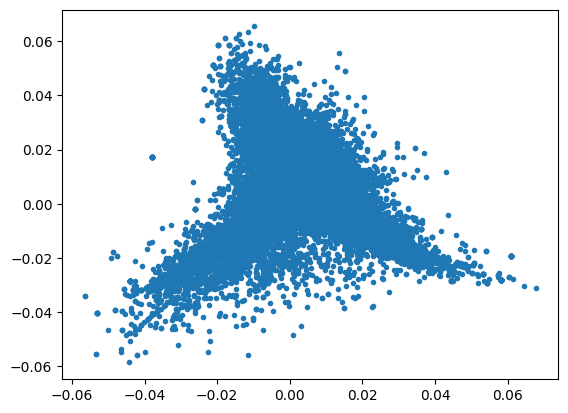

In [12]:
plt.plot(u_train.iloc[:,1], u_train.iloc[:,2],'.')

In [13]:
# validation make sure the features in both the train and test are the same
all(train_words_numerical.columns) == all(test_words_numerical.columns)

True

In [14]:
len(vectorizer.get_feature_names_out())

33111

## Logistic Regression

In [15]:
from sklearn.metrics import f1_score, classification_report

k=5
f1_scores = []

for k in np.arange(300, 1500, 500):
    # logistic regression with reduced-dimensional features
    lr2_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
    lr2_classifier.fit(u_train.iloc[:, :k], y_train)

    # Test set accuracy:
    lr2_predictions_test = lr2_classifier.predict(u_test.iloc[:, :k])
    f1_test = f1_score(y_test, lr2_predictions_test, average='macro')

    # Training set accuracy:
    lr2_predictions_train = lr2_classifier.predict(u_train.iloc[:, :k])
    f1_train = f1_score(y_train, lr2_predictions_train, average='macro')

    f1_scores.append({'k': k, 'f1_test': f1_test, 'f1_train': f1_train})

    print(f'Using k={k} PCs:')
    lr2_report_test = classification_report(y_test, lr2_predictions_test)
    print(lr2_report_test)

Using k=300 PCs:
                         precision    recall  f1-score   support

            accessories       0.75      0.71      0.73       896
             appliances       0.82      0.83      0.82       911
         bags & luggage       0.70      0.68      0.69       903
        beauty & health       0.62      0.77      0.69       857
        car & motorbike       0.75      0.80      0.77       864
grocery & gourmet foods       0.81      0.80      0.81       610
         home & kitchen       0.63      0.68      0.65       897
    industrial supplies       0.68      0.64      0.66       824
          kids' fashion       0.72      0.74      0.73       916
         men's clothing       0.88      0.90      0.89       908
            men's shoes       0.80      0.84      0.82       894
                  music       0.88      0.66      0.75       207
           pet supplies       0.90      0.85      0.87       285
       sports & fitness       0.67      0.60      0.63       936
       

<Axes: xlabel='k'>

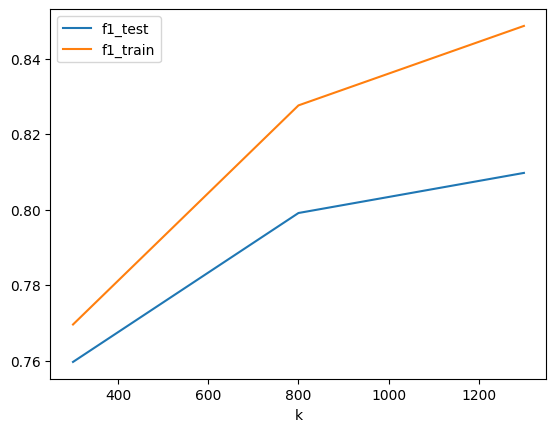

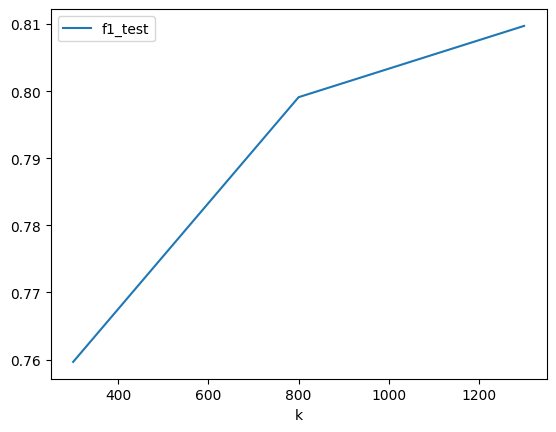

In [16]:
df_f1 = pd.DataFrame(f1_scores)
df_f1.plot(x='k')
df_f1.plot(x='k', y='f1_test')

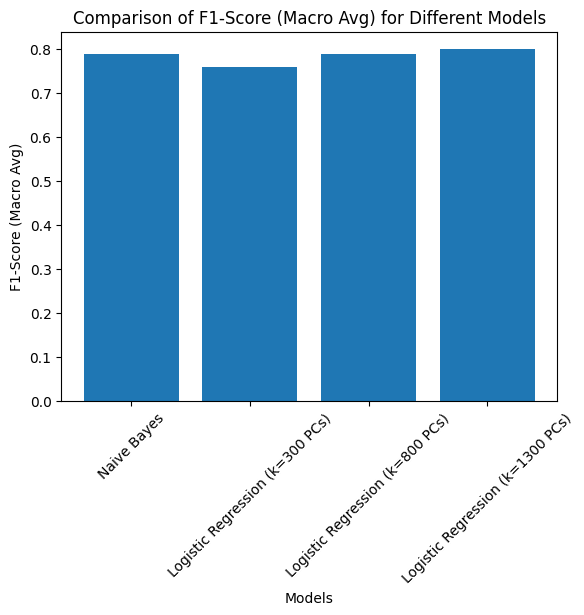

In [17]:

# F1-Score (weighted average) for each model
f1_score = [0.79, 0.76, 0.79, 0.80]
models = ['Naive Bayes', 'Logistic Regression (k=300 PCs)', 'Logistic Regression (k=800 PCs)', 'Logistic Regression (k=1300 PCs)']

plt.bar(models, f1_score)

plt.xlabel('Models')
plt.ylabel('F1-Score (Macro Avg)')
plt.title('Comparison of F1-Score (Macro Avg) for Different Models')

plt.xticks(rotation = 45)

plt.show()